In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from psfmodels.cuvec import vectorial_psf as cuvpsf, vectorial_rz
from psfmodels import vectorial_psf as vpsf 
import numpy as np
import cupy as cp
from cupyx.scipy.special import j0, j1
import matplotlib.pyplot as plt
from cupyx.scipy.ndimage import map_coordinates
import tifffile as tf
from matplotlib.colors import PowerNorm
mat_result = tf.imread('tests/matpsf.tif')

npdiff 0.050000000000000044
(61, 31, 31)
(61, 31, 31)


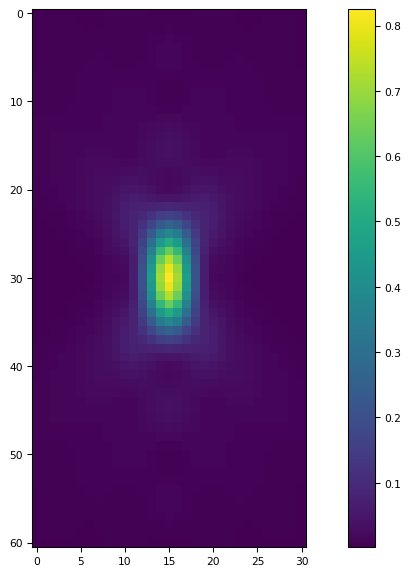

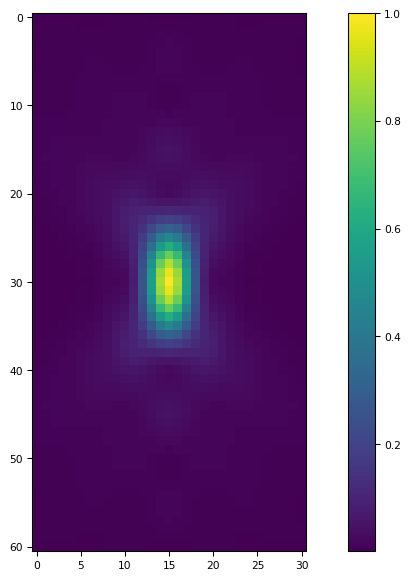

In [46]:

zrange = 3
step = 0.05
dxy = 0.05
nx = 31
zv = np.arange(-zrange/2, zrange/2+step, step)
wvl = 0.550

sf = 3
params = {
    'NA': 1.45,
    'ti0' : 190,
    'ni0' : 1.518,
    'ni' : 1.518,
    'tg0' : 170,
    'tg' : 170,
    'ng0' : 1.5150,
    'ng' : 1.5150,
    'ns' : 1.515,
    'M' : 1,
    'NA' : 1.4500,
    'sf': sf
}

nz = len(zv)
ny = nx
pos = (0,0,0)
cuda_result = cuvpsf(zv, nx=nx, ny = ny, dxy=dxy, params=params, wvl=wvl, sf=sf, pos=pos)
cpu_result = vpsf(zv, nx=nx, dxy=dxy, params=params, wvl=wvl, pz=pos[0])
tf.imshow(cuda_result[:,ny//2])
tf.imshow(cpu_result[:,ny//2])
#tf.imshow(mat_result[:,ny//2])

print("npdiff", np.diff(zv)[0])
print(cuda_result.shape)
print(cuda_result.shape)

In [4]:
tf.imshow(cuda_result[:, nx//2] / mat_result[:, nx//2])

IndexError: index 64 is out of bounds for axis 1 with size 61

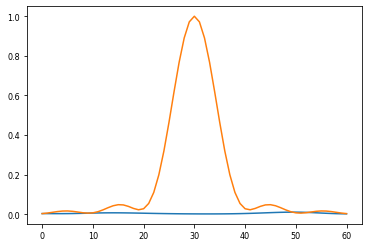

In [98]:
plt.plot(mat_result[:,nx//2,nx//2] / mat_result.max())
# plt.plot(cuda_result[:,nx//2,nx//2] / cuda_result.max())
plt.plot(cpu_result[:,nx//2,nx//2] / cpu_result.max())

(61, 124, 124)
CPU times: user 116 ms, sys: 35.6 ms, total: 151 ms
Wall time: 151 ms


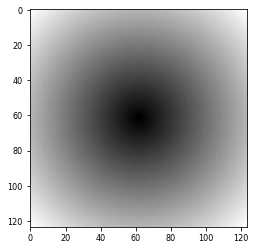

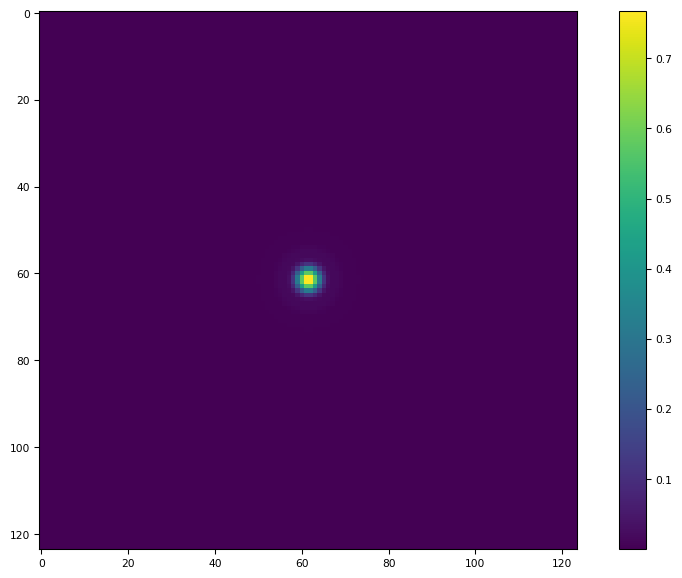

In [165]:
%%time 
ny=nx*4
cuda_resultB = cuvpsf(zv, nx=nx*4, ny = ny, dxy=dxy, params=params, wvl=wvl, sf=sf, pos=(0, 0, 0))
tf.imshow(cuda_resultB[len(zv)//2])
print(cuda_resultB.shape)